<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [2]:
import pandas as pd

yelp = pd.read_json('review_sample.json', lines=True)

In [3]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [4]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import spacy


nlp = spacy.load('en_core_web_lg')


STOPWORDS = set(STOPWORDS).union(set(['come', ' ', 'drinks', '\\n', 'lunch', 'eat', '$', 'got', 'food', 'the', 'it', 'place', '+', 'service', 'time']))

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [6]:
yelp['token']= yelp['text'].apply(tokenize)
yelp['token'].head()

0    [beware, fake, fake, fake, small, business, lo...
1    [came, togo, quick, staff, friendly, complaint...
2    [ve, vegas, dozens, times, stepped, foot, circ...
3    [went, night, closed, street, party, best, act...
4    [stars, bad, price, seniors, pay, eating, hot,...
Name: token, dtype: object

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizer 
tfidf = TfidfVectorizer(stop_words = 'english')
sparse = tfidf.fit_transform(yelp['text'])

In [8]:
# Make a dataframe
v_yelp = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names())

In [9]:
from sklearn.neighbors import NearestNeighbors

# Fit 
nn = NearestNeighbors(n_neighbors=10, algorithm='auto')
nn.fit(v_yelp)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [10]:
nn.kneighbors([v_yelp.iloc[0]])

(array([[0.        , 1.28246091, 1.29625505, 1.30062127, 1.30515772,
         1.31123683, 1.31277998, 1.31901052, 1.321382  , 1.33014107]]),
 array([[   0, 2131, 6019, 3276, 8470, 2943, 9036, 2621, 3714, 2207]]))

In [11]:
yelp['text'][9]


'Wow. I walked in and sat at the bar for 10 minutes. All the bartenders working and not one even said "Be right with you". And I was sitting next to the waitress station. The bartenders would chat with the waitresses and ignore me. I finally got a bartender\'s attention after about 15 minutes. Not that busy. I don\'t understand. I don\'t think I\'ll return. I\'ve been to many bars, many of the Stations casino\'s bars and I\'ve never seen service like this.'

In [12]:
fake_t = ['Wow. I walked in and sat at the bar for 10 minutes. All the bartenders working and not one even said "Be right with you". And I was sitting next to the waitress station. The bartenders would chat with the waitresses and ignore me. I finally got a bartender\'s attention after about 15 minutes. Not that busy. I don\'t understand. I don\'t think I\'ll return. I\'ve been to many bars, many of the Stations casino\'s bars and I\'ve never seen service like this.']

In [13]:
sparse_fake = tfidf.transform(fake_t)
fake = sparse_fake.todense()

In [14]:
nn.kneighbors(fake)

(array([[0.        , 1.23034778, 1.23147403, 1.23853802, 1.26181747,
         1.26976867, 1.2709768 , 1.2810479 , 1.28237866, 1.28257222]]),
 array([[   9,  610, 6528, 9122, 5396, 9336, 1739, 9957, 3415, 3863]]))

In [15]:
for x in nn.kneighbors(fake)[1]:
    print(yelp['text'][x][:50])

9       Wow. I walked in and sat at the bar for 10 min...
610     Don't sit at the yellow bar!! Bartender walked...
6528    TERRIBLE SERVICE!! They made us sit at the bar...
9122    I usually only write positive Yelp reviews as ...
5396    Beer is Ice Cold, food is ok...but the bartend...
9336    I wish I could give this place negative stars....
1739    Very disappointed last night. My family of fou...
9957    This was the most awful meal and service we ex...
3415    Be careful at the bar because the bartenders a...
3863    This is the only Jack in the Box that has been...
Name: text, dtype: object


## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [17]:
tfidf_v = TfidfVectorizer(stop_words='english', max_features=1825, max_df=0.9)
mnb = MultinomialNB()

pipe = Pipeline([('vect', tfidf_v), ('clf', mnb)])

In [18]:
pipe.fit(yelp['text'], yelp['stars'])

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=1825, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [20]:
pred = pipe.predict(fake_t)

In [21]:
parameters = {
    'vect__max_df': (.6, .7, .8),
    'vect__min_df': (10, 20, 30),
    'vect__max_features': (500, 1000, 1500, 2000)
}

In [22]:
grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(yelp['text'], yelp['stars'])

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=1825, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vect__max_df': (0.6, 0.7, 0.8), 'vect__min_df': (10, 20, 30), 'vect__max_features': (500, 1000, 1500, 2000)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [23]:
grid_search.best_params_

{'vect__max_df': 0.6, 'vect__max_features': 2000, 'vect__min_df': 30}

In [25]:
grid_pred = grid_search.predict(fake_t)

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [26]:
import numpy as np
import gensim
import os
import re

from gensim.models import LdaMulticore
from gensim.corpora import Dictionary
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore
import warnings
warnings.filterwarnings('ignore')

Learn the vocubalary of the yelp data:

In [27]:
id2word = corpora.Dictionary(yelp['token'])

In [28]:
id2word.filter_extremes(no_below=30, no_above=0.75)

Create a bag of words representation of the entire corpus

In [30]:
corpus = [id2word.doc2bow(text) for text in yelp['token']]

Your LDA model should be ready for estimation: 

In [31]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 10 # You can change this parameter
                  )

Create 1-2 visualizations of the results

In [32]:
lda.print_topics()

[(0,
  '0.015*"great" + 0.013*"good" + 0.010*"like" + 0.006*"best" + 0.005*"people" + 0.005*"chicken" + 0.005*"restaurant" + 0.005*"nice" + 0.005*"ordered" + 0.004*"order"'),
 (1,
  '0.017*"great" + 0.014*"good" + 0.010*"like" + 0.006*"best" + 0.005*"people" + 0.005*"try" + 0.005*"amazing" + 0.005*"went" + 0.005*"love" + 0.005*"restaurant"'),
 (2,
  '0.019*"good" + 0.013*"great" + 0.011*"like" + 0.006*"staff" + 0.006*"best" + 0.006*"nice" + 0.005*"order" + 0.005*"love" + 0.005*"came" + 0.005*"ordered"'),
 (3,
  '0.014*"great" + 0.012*"good" + 0.010*"like" + 0.007*"love" + 0.006*"ve" + 0.006*"day" + 0.005*"best" + 0.005*"try" + 0.005*"staff" + 0.005*"friendly"'),
 (4,
  '0.015*"good" + 0.014*"like" + 0.010*"great" + 0.007*"nice" + 0.005*"ordered" + 0.005*"ve" + 0.005*"order" + 0.005*"new" + 0.005*"better" + 0.005*"came"'),
 (5,
  '0.015*"great" + 0.011*"good" + 0.007*"ve" + 0.006*"like" + 0.005*"try" + 0.005*"definitely" + 0.005*"nice" + 0.005*"little" + 0.004*"menu" + 0.004*"told"'),
 

In [33]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words if t[0]!='a']

In [34]:
num = 1
for t in topics:
    print(t)
    print("\n")

great good like best people


great good like best people


good great like staff best


great good like love ve


good like great nice ordered


great good ve like try


good like great ve staff


good great like ve amazing


good like great nice order


great good like best chicken




In [35]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [36]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.003168 -0.001916       1        1  10.238301
2      0.004446 -0.003611       2        1  10.150952
1     -0.000773 -0.002743       3        1  10.125451
7     -0.004406  0.001870       4        1  10.020111
3     -0.003469 -0.001684       5        1  10.017740
5     -0.003133 -0.002007       6        1   9.928184
8      0.003948  0.004495       7        1   9.927786
0      0.000667  0.002850       8        1   9.873157
6      0.000608 -0.000381       9        1   9.859698
9     -0.001055  0.003125      10        1   9.858610, topic_info=     Category         Freq        Term        Total  loglift  logprob
158   Default  4319.000000       great  4319.000000  30.0000  30.0000
9     Default  3476.000000        like  3476.000000  29.0000  29.0000
26    Default  4650.000000        good  4650.000000  28.0000  28.0000
83    Default  1952.000000          ve  1952.000000  27.0000  27.0000
331   Default  1225.000000         day  1225.000000  26.0000  26.0000
521   Default  1663.000000        love  1663.000000  25.0000  25.0000
65    Default  1763.000000        nice  1763.000000  24.0000  24.0000
290   Default  1515.000000       order  1515.000000  23.0000  23.0000
825   Default  1410.000000     chicken  1410.000000  22.0000  22.0000
231   Default  1465.000000         try  1465.000000  21.0000  21.0000
30    Default  1574.000000       staff  1574.000000  20.0000  20.0000
119   Default   912.000000       price   912.000000  19.0000  19.0000
118   Default  1070.000000      pretty  1070.000000  18.0000  18.0000
146   Default  1376.000000     amazing  1376.000000  17.0000  17.0000
358   Default  1230.000000        know  1230.000000  16.0000  16.0000
1235  Default   622.000000         car   622.000000  15.0000  15.0000
143   Default   716.000000       tried   716.000000  14.0000  14.0000
257   Default   691.000000     awesome   691.000000  13.0000  13.0000
96    Default  1447.000000      people  1447.000000  12.0000  12.0000
139   Default  1172.000000   recommend  1172.000000  11.0000  11.0000
243   Default   777.000000          ll   777.000000  10.0000  10.0000
159   Default   398.000000        hair   398.000000   9.0000   9.0000
234   Default  1044.000000        want  1044.000000   8.0000   8.0000
175   Default  1122.000000         way  1122.000000   7.0000   7.0000
263   Default   837.000000      cheese   837.000000   6.0000   6.0000
90    Default  1833.000000        best  1833.000000   5.0000   5.0000
390   Default   976.000000        told   976.000000   4.0000   4.0000
569   Default   569.000000     friends   569.000000   3.0000   3.0000
1575  Default   197.000000          la   197.000000   2.0000   2.0000
278   Default   946.000000       fresh   946.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
100   Topic10   104.258720         bad   839.544739   0.2308  -5.8140
316   Topic10   104.618027       asked   848.687683   0.2234  -5.8106
90    Topic10   204.850754        best  1833.952393   0.1249  -5.1386
271   Topic10   145.662949   delicious  1250.904541   0.1665  -5.4796
158   Topic10   426.448303       great  4319.246094   0.0015  -4.4054
67    Topic10   117.942444       night   987.734375   0.1916  -5.6907
143   Topic10    89.129684       tried   716.723999   0.2322  -5.9708
25    Topic10   155.714157    friendly  1401.215332   0.1198  -5.4129
521   Topic10   178.223145        love  1663.488159   0.0832  -5.2779
299   Topic10    99.696045       sauce   828.163818   0.1997  -5.8588
102   Topic10   100.462006         bit   843.826782   0.1887  -5.8511
286   Topic10   153.944489      little  1440.458984   0.0807  -5.4243
146   Topic10   144.759384     amazing  1376.106567   0.0649  -5.4858
817   Topic10   156.948868     ordered  1557.469116   0.0219  -5.4050
30    Topic10   157.849442       staff  1574.800293   0.0166  -5.3992
23    Topic10   150

In [37]:
from collections import Counter

def count(docs):
    
    word_counts = Counter()
    appears_in = Counter()
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns=['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    
    total = wc['count'].sum()
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    total_docs = len(docs)
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

In [39]:
wc = count(yelp['token'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
44,good,3228,4806,1.0,0.010505,0.010505,0.3228
229,great,3101,4297,2.0,0.009393,0.019898,0.3101
21,like,2498,3558,3.0,0.007777,0.027675,0.2498
95,ve,1466,1924,4.0,0.004206,0.031881,0.1466
101,nice,1429,1748,5.0,0.003821,0.035702,0.1429


In [40]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

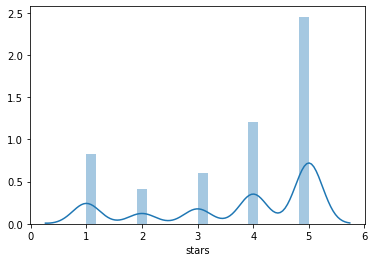

In [41]:
sns.distplot(yelp['stars']);

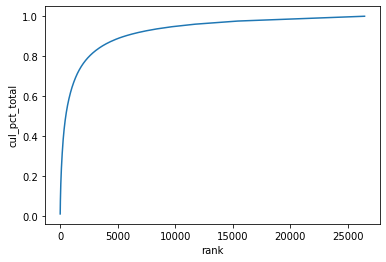

In [42]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc)

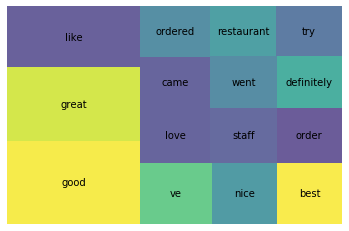

In [43]:
t= wc[wc['rank'] <= 15]

squarify.plot(sizes=t['pct_total'], label=t['word'], alpha=0.8)
plt.axis('off')
plt.show()

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)